# TAREA 7

En esta tarea trabajaremos con el conjunto de datos de cancer de mama que
hemos estudiado anteriormente.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset["data"]             # características (features) del conjunto de datos
y = dataset["target"]           # etiquetas (labels) donde 0 para maligno y 1 para benigno.

Los pasos a seguir despues de cargar el conjunto de datos y dividirlo en un
conjunto de entrenamiento (80%) y un conjunto de prueba (20%) son:

In [3]:
print(X)
print( )
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1

Imprimos shape de X, lo que representa las dimensiones de la matriz de datos

In [4]:
print(X.shape)

(569, 30)


Dividamos el conjunto en entrenamiento (80%) y prueba (20%) y fijo semilla para obtenr el mismo resultado.

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# train_test_split divide el conjunto de datos de manera aleatoria.
# test_size=0.2 significa que el 20% se reserva para pruebas.

## 1.

Entrena un  ́unico  ́arbol de decisi ́on usando par ́ametros razonables (define
que es razonable para ti?!) en el conjunto de entrenamiento y luego calcula
su precisi ́on en el conjunto de prueba.

Por lo que entiendo, debo crear mi arbol a mi criterio,

1. Recordemos que para evitar un sobre ajuste no debemos tener un árbol muy profundo, así que escogere una profundidad 5 niveles, pues considero que al tener 30 caracterisitcas esta profundidad es suficiente para capturar patrones significativos.

2. También invetigando, DecisionTreeClassifier usa Gini por defecto, por lo que al no  especificar el parámetro criterion, el modelo lo usará automáticamente. Lo agregaré solo para irlo recordando.

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

 Evaluemos el modelo en el conjunto de prueba

In [7]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)                    # Predice las etiquetas para los datos de prueba usando el modelo entrenado.
accuracy = accuracy_score(y_test, y_pred)       # Calcula la precisión comparando las predicciones con las etiquetas reales.
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}\n")
for i in range(len(X_test)):
    print(f"Real: {y_test[i]}, Predicho: {y_pred[i]}")

Precisión en el conjunto de prueba: 0.9649

Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 0, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 0, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 1, Pr

## 2.
Evalua el mismo arbol de decision utilizando validacion cruzada con 5
particiones. Al final, calcula el promedio ponderado de las precisiones
obtenidas en cada fold, y compara con el resultado previo.

Hagamos la validación cruzada con 5 particiones

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# cv=5 Especifica que usaremos 5 particiones (K-Fold) en la validación cruzada.
# scoring='accuracy' Define cómo se mide el rendimiento del modelo
# Y en el curso  cuando hablamos de "precisión" hacemos referencia al 'accuracy de los folds'

VEamos la lista que contiene las precisiones individuales de cada uno de los 5 folds.

In [9]:
print(f"Precisión en cada fold: {scores}")

Precisión en cada fold: [0.9010989  0.94505495 0.92307692 0.91208791 0.91208791]


El promedio ponderado considera el tamaño de cada partición (fold) al calcular la precisión global.

Sin embargo, en K-Fold tradicional, todos los folds tienen el mismo tamaño, por lo que el promedio simple es suficiente.

In [10]:
# Promedio simple (todos los folds tienen el mismo peso)
mean_accuracy = scores.mean()
print(f"Precisión promedio ponderada (K-Fold): {mean_accuracy:.4f}")


Precisión promedio ponderada (K-Fold): 0.9187


En este caso al no haber trabajdo con validación estratificada o particiones desiguales, no hubo necesidad de asignar que los folds más grandes tengan mayor peso en el resultado.

comparemos el resultado de validación cruzada con la precisión en el conjunto de prueba que teniamos:

In [11]:
test_accuracy = clf.score(X_test, y_test)

print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio ponderada (K-Fold): {mean_accuracy:.4f}")


Precisión en el conjunto de prueba: 0.9649
Precisión promedio ponderada (K-Fold): 0.9187


Invstigando vi que:

1. Si el promedio de K-Fold es similar al conjunto de prueba: El modelo generaliza bien, y no hay evidencia de sobreajuste o subajuste.

2. Si la precisión del conjunto de prueba es mucho mayor que el promedio K-Fold: El modelo podría estar sobreajustando, rindiendo bien solo en ciertos datos.

3. Si la precisión del conjunto de prueba es mucho menor que el promedio K-Fold: El modelo podría estar subajustando o el conjunto de prueba es demasiado difícil.

Por lo que la diferencia indica un posible sobreajuste. La precisión en el conjunto de prueba es alta porque el modelo se ajusta bien a esos datos, pero la precisión de K-Fold es menor, lo que sugiere que el modelo no generaliza tan bien a otros subconjuntos del entrenamiento.

Pdríamos considerar cambiar el número de Folds y ver que pasa.

In [12]:
for i in range(2, 16):
    scores = cross_val_score(clf, X_train, y_train, cv=i, scoring='accuracy')
    print(f"Promedio con {i} folds: {np.mean(scores):.4f}")

Promedio con 2 folds: 0.9231
Promedio con 3 folds: 0.9143
Promedio con 4 folds: 0.9121
Promedio con 5 folds: 0.9187
Promedio con 6 folds: 0.9208
Promedio con 7 folds: 0.9143
Promedio con 8 folds: 0.9251
Promedio con 9 folds: 0.9340
Promedio con 10 folds: 0.9450
Promedio con 11 folds: 0.9273
Promedio con 12 folds: 0.9405
Promedio con 13 folds: 0.9341
Promedio con 14 folds: 0.9317
Promedio con 15 folds: 0.9360


Vemos que a medida que aumentan los folds, la precisión promedio mejora y se estabiliza, alcanzando su valor más alto con 10 folds (0.9450).

Duda resuelta por Ay. Silvia Viridiana:

Con base a la investigación que expones, los  puntos que describes son ciertos: si la precisión del conjunto de prueba es mucho mayor que el promedio K-Fold, el modelo podría estar sobreajustando. Sin embargo, en tu caso, la diferencia es pequeña: 0.9649 - 0.9187 = 0.0462 (Diferencia porcentual de 4.6%), como tal, no existe un criterio establecido, hay quienes consideran que si la diferencia es mayor al 5% significa que está sobreajustado, y en tu caso no lo es pero está en los límites, es decir, podría mejorarse. Te sugiero que explores qué pasa con una profundidad de 4.

En cuanto al número de folds, aumentar su cantidad hace que el conjunto de entrenamiento sea más grande y el de validación más pequeño. Esto reduce la varianza al validar sobre tu conjunto de validación, pero puede aumentar el sesgo, ya que el modelo entrena con conjuntos de datos cada vez más parecidos. Ya que has notado cierto punto de estabilidad en la precisión con ciertos folds, puedes basarte en ellos para argumentar el equilibrio entre el sesgo de tus conjuntos de entrenamiento y la varianza de los conjunto prueba.

In [13]:
dataset = load_breast_cancer()
X = dataset["data"]
y = dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=123)

In [14]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}\n")

Precisión en el conjunto de prueba: 0.9649



In [15]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Precisión en cada fold: {scores}")
mean_accuracy = scores.mean()
print(f"Precisión promedio ponderada (K-Fold): {mean_accuracy:.4f}")

Precisión en cada fold: [0.95604396 0.95604396 0.92307692 0.92307692 0.9010989 ]
Precisión promedio ponderada (K-Fold): 0.9319


Así que ahora:

In [16]:
test_accuracy = clf.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio ponderada (K-Fold): {mean_accuracy:.4f}")

Precisión en el conjunto de prueba: 0.9649
Precisión promedio ponderada (K-Fold): 0.9319


Queda más estable reduciendo la profundidad.

## 3.
Aplica gradient boosting usando parametros razonables (por ejemplo,
n estimators=100, max depth=3) y calcula su precisi ́on en el conjunto de
prueba.

Nuevamente carguemos los datos (esto no es necesario, ya está, pero lo hago para cada que tenga dudas o en un futuro quiera revisar esta pregunta, no subir hasta arriba)

In [17]:
dataset = load_breast_cancer()
X = dataset["data"]
y = dataset["target"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


USemos el modelo Gradient Boosting con la recomendación de parametros

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=123)
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=123)

La Predicción en el conjunto de prueba:

In [20]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Nuevemente hacemos la validación con 5 folds

In [21]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()

In [22]:
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")
print(f"Precisión de validación cruzada: {mean_accuracy:.4f}")

Precisión en el conjunto de prueba: 0.9737
Precisión de validación cruzada: 0.9626


PAra este caso vemos que hemos podido reducir áun más la diferencia entre las precisiones, así que en definitiva no está sobre ajustado  y genezalizará muy bien datos nuevo con alta presición.

Info para mí:

Gradient Boosting es un algoritmo de ensemble learning que combina árboles de decisión débiles secuencialmente, corrigiendo errores iterativamente. Se usa gradient descent para optimizar la función de pérdida.

Ventajas:
- Suele superar a modelos como Random Forest o árboles individuales.
- Funciona bien con datos numéricos/categóricos y captura relaciones no lineales.
- Control de sobreajuste

## 4.
Analiza como afecta el parametro learning rate, uno de los parametros mas importantes en gradient boosting, a la precision probando diferentes valores (por ejemplo: 0.01, 0.1, 0.3, 0.5).

Lista del ejemplo:

In [23]:
learning_rates = [0.01, 0.1, 0.3, 0.5]

Diccionario para almacenar resultados

In [24]:
results = {}

HAgamos un ciclo para porvarlos valores de la lista y los almacenamos.

In [25]:
for lr in learning_rates:
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=lr, random_state=123)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()

    results[lr] = (test_accuracy, mean_accuracy)

    print(f"Learning Rate: {lr}")
    print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
    print(f"Precisión de validación cruzada: {mean_accuracy:.4f}")
    print( )
results

Learning Rate: 0.01
Precisión en el conjunto de prueba: 0.9649
Precisión de validación cruzada: 0.9319

Learning Rate: 0.1
Precisión en el conjunto de prueba: 0.9737
Precisión de validación cruzada: 0.9626

Learning Rate: 0.3
Precisión en el conjunto de prueba: 0.9737
Precisión de validación cruzada: 0.9692

Learning Rate: 0.5
Precisión en el conjunto de prueba: 0.9737
Precisión de validación cruzada: 0.9692



{0.01: (0.9649122807017544, np.float64(0.9318681318681319)),
 0.1: (0.9736842105263158, np.float64(0.9626373626373625)),
 0.3: (0.9736842105263158, np.float64(0.9692307692307691)),
 0.5: (0.9736842105263158, np.float64(0.9692307692307691))}

OBS.

- Learning Rate: 0.01

Fue la precisión  en el conjunto de prueba que salio más baja con 96.49%.

Fue la de menor precisión promedio en validación cruzada 93.19%.

- Learning Rate: 0.1

Se aumenta la precisión tanto en la prueba como en la validación cruzada, alcanzando 97.37% en prueba y 96.26% en validación cruzada.

- Learning Rate: 0.1

Los junto porque salen iguales y la presición prueba sigue siendo 97.37%, pero la precisión en validación cruzada mejora a  97.14%.

Tenemos un learning rate alto y justo mejora la convergencia sin afectar la generalización en este caso.


##5.

Entrena un bosque aleatorio usando los par ́ametros que vimos en la clase
sobre el conjunto de entrenamiento y calcula su precisi ́on sobre el conjunto
de prueba.

Nuevamente carguemos datos

In [26]:
dataset = load_breast_cancer()
X = dataset["data"]
y = dataset["target"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Ahora usemos Random Forest para el modelo

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=123)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

Predicción del conjunto de prueba para random forest,

In [29]:
y_rf_pred = rf_clf.predict(X_test)

Precisión en el conjunto de prueba

In [30]:
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f"Precisión en el conjunto de prueba: {rf_accuracy:.4f}")

Precisión en el conjunto de prueba: 0.9912


Validación cruzada con K-Fold (k=5)

In [31]:
rf_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
rf_mean_accuracy = rf_scores.mean()
print(f"Precisión en cada fold: {rf_scores}")
print(f"Precisión promedio: {rf_mean_accuracy:.4f}")

Precisión en cada fold: [0.96703297 0.94505495 0.93406593 0.93406593 0.93406593]
Precisión promedio: 0.9429


In [32]:
print(f"Precisión en el conjunto de prueba: {rf_accuracy:.4f}")
print(f"Precisión de validación cruzada: {rf_mean_accuracy:.4f}")

Precisión en el conjunto de prueba: 0.9912
Precisión de validación cruzada: 0.9429


Sucede algo similar a lo comentado en el incio, pues  la precisión en el conjunto de prueba es significativamente mayor que la precisión en validación cruzada y podría ser una señal de sobreajuste.

## 6.

Compara la matriz de confusi ́on de los tres modelos ( ́arbol, boosting y
bosque aleatorio) y comenta sobre los tipos de errores que cometen y cu ́al
generaliza mejor?

In [33]:
from sklearn.metrics import confusion_matrix

Recordando que la matriz de confusión muestra cuántas predicciones fueron correctas e incorrectas en cada clase:

|   | Predicción: Benigno (0) | Predicción: Maligno (1) |
|---|---|---|
|Real: Benigno (0) | Verdaderos Negativos (TN) | Falsos Positivos (FP) |
| Real: Maligno (1) | Falsos Negativos (FN) | Verdaderos Positivos (TP) |

**Árbol de Decisión**

In [34]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=123)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matriz de confusión - Árbol de Decisión:\n", conf_matrix_tree)

Matriz de confusión - Árbol de Decisión:
 [[38  3]
 [ 1 72]]


- 38 Verdaderos Negativos (TN): 38 casos benignos correctamente clasificados como benignos.

- 3 Falsos Positivos (FP): 3 casos benignos incorrectamente clasificados como malignos.

- 1 Falso Negativo (FN): 1 caso maligno incorrectamente clasificado como benigno.

- 72 Verdaderos Positivos (TP): 72 casos malignos correctamente clasificados como malignos.

Tenemos 3 falsos positivos y 1 falso negativo, donde ese falso negativo es muy malo en términos sociales y médicos, pues tenemos un paciente con cáncer fue clasificado erróneamente como sano.

**Gradient Boosting**

In [35]:
clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=123)
clf.fit(X_train, y_train)
y_pred_boost = clf.predict(X_test)

conf_matrix_boost = confusion_matrix(y_test, y_pred_boost)
print("Matriz de confusión - Gradient Boosting:\n", conf_matrix_boost)

Matriz de confusión - Gradient Boosting:
 [[39  2]
 [ 1 72]]


- 39 Verdaderos Negativos (TN): 39 casos benignos correctamente clasificados como benignos.

- 2 Falsos Positivos (FP): 2 casos benignos incorrectamente clasificados como malignos.

- 1 Falso Negativo (FN): 1 caso maligno incorrectamente clasificado como benigno.

- 72 Verdaderos Positivos (TP): 72 casos malignos correctamente clasificados como malignos.

Similar al árbol de decisión, el falso negativo sigue siendo importante, pero hay menos falsos positivos.

**Bosque Aleatorio**

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

y_pred_rf = rf_clf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusión - Bosque Aleatorio:\n", conf_matrix_rf)

Matriz de confusión - Bosque Aleatorio:
 [[40  1]
 [ 0 73]]


- 40 Verdaderos Negativos (TN): 40 casos benignos correctamente clasificados como benignos.

- 1 Falso Positivo (FP): 1 caso benigno incorrectamente clasificado como maligno.

- 0 Falsos Negativos (FN): No hay casos malignos incorrectamente clasificados como benignos.

- 73 Verdaderos Positivos (TP): 73 casos malignos correctamente clasificados como malignos.

Vemos que en este modelo no hubo falsos negativos, lo cual es lo que nos importa en el contexto medico.



¿Qué modelo generaliza mejor?

Para este caso en defintiva el Bosque Aleatorio tiene la mejor capacidad de generalización, ya que tiene menos errores, especialmente en términos de falsos negativos.

La opción de usar Gradient Boosting presenta menos falsos positivos que el Árbol de Decisión.

## 7.

Estudia como varıa el rendimiento del bosque aleatorio a medida que crece
el numero de arboles. Prueba valores de n estimators desde 10 hasta 100
(en pasos de 10), y grafica la precision en el conjunto de prueba.

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Nuevamente cargamos los datos (recordando que esto lo hago para cuando necesite hacer algo similar en el futuro tener la visión completa del problema)

In [38]:
dataset = load_breast_cancer()
X = dataset["data"]
y = dataset["target"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Entrnemos con Bosque Aleatorio con diferentes valores de n_estimators

In [40]:
n_estimators_range = range(10, 101, 10)
accuracies = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=123)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"n_estimators: {n_estimators}, Accuracy: {accuracy:.4f}")

n_estimators: 10, Accuracy: 0.9649
n_estimators: 20, Accuracy: 0.9649
n_estimators: 30, Accuracy: 0.9825
n_estimators: 40, Accuracy: 0.9912
n_estimators: 50, Accuracy: 0.9912
n_estimators: 60, Accuracy: 0.9912
n_estimators: 70, Accuracy: 0.9912
n_estimators: 80, Accuracy: 0.9912
n_estimators: 90, Accuracy: 0.9912
n_estimators: 100, Accuracy: 0.9912


Grafiquemos los datos:

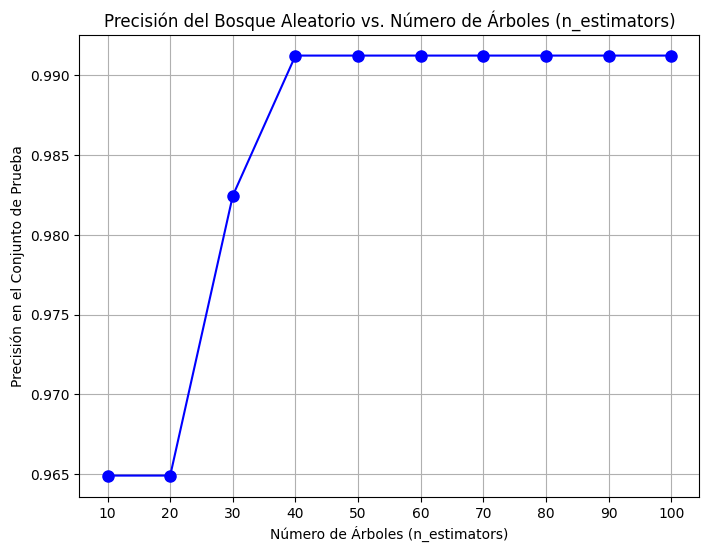

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, accuracies, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Precisión del Bosque Aleatorio vs. Número de Árboles (n_estimators)')
plt.xlabel('Número de Árboles (n_estimators)')
plt.ylabel('Precisión en el Conjunto de Prueba')
plt.grid(True)
plt.xticks(n_estimators_range)
plt.show()


Vemos que la precisión aumenta y se estabiliza después de un número específico de árboles, en este caso por la escala de saltos de 10 en 10 lo podemos ver a los 40 arboles.

Así que al agregar más árboles mejora el rendimiento hasta que el modelo, pero una vez que esta suficientemente entrenado y no mejora más,puede empezar a sobreajustarse si el número de árboles es excesivamente grande.

## 8.
Al igual que con los  ́arboles de decisi ́on, los bosques aleatorios pueden calcular la importancia de las caracteristicas utilizadas. Esto se hace agregando la importancia de las caracteristicas de los  ́arboles en un solo valor.

Si Iab es la importancia de la caracteristica a segun el  ́arbol b, la importancia de la caracter ́ıstica a segun el bosque aleatorio se puede calcular como sigue:
$$ I_a=(∑_j^ (Ia_J ))/(∑_i^  ∑_j^ I_ij ) $$


Es decir, la importancia general de una caracter ́ıstica se da por la suma de
la importancia de esa caracter ́ıstica a trav ́es de todos los  ́arboles, dividida
por la suma de las importancias de todas las caracter ́ısticas en todos los
 ́arboles.
Puedes acceder a esto mediante el atributo feature importances . Obten
las importancias de las 30 caracteristicas y visual ́ızalas con una gr ́afica de
barras ordenadas.

In [42]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

Entrenemos un modelo de Bosque Aleatorio

In [43]:
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

Usemos feature_importances_ para saber la importancia de cada característica.

In [44]:
importances = rf.feature_importances_
feature_names = dataset["feature_names"]

print("Importancia de las características:")
for i, (feature, importance) in enumerate(zip(feature_names, importances), 1):
    print(f"{i}. {feature}: {importance:.4f}")

Importancia de las características:
1. mean radius: 0.0292
2. mean texture: 0.0126
3. mean perimeter: 0.0405
4. mean area: 0.0345
5. mean smoothness: 0.0064
6. mean compactness: 0.0143
7. mean concavity: 0.0638
8. mean concave points: 0.1340
9. mean symmetry: 0.0037
10. mean fractal dimension: 0.0052
11. radius error: 0.0079
12. texture error: 0.0039
13. perimeter error: 0.0105
14. area error: 0.0412
15. smoothness error: 0.0047
16. compactness error: 0.0036
17. concavity error: 0.0049
18. concave points error: 0.0033
19. symmetry error: 0.0046
20. fractal dimension error: 0.0053
21. worst radius: 0.1108
22. worst texture: 0.0252
23. worst perimeter: 0.0986
24. worst area: 0.1288
25. worst smoothness: 0.0152
26. worst compactness: 0.0147
27. worst concavity: 0.0319
28. worst concave points: 0.1272
29. worst symmetry: 0.0081
30. worst fractal dimension: 0.0056


Vamos a ordenar las características por importancia

In [45]:
sorted_indices = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

print("Importancia de las características (ordenadas):")
for i, (feature, importance) in enumerate(zip(sorted_features, sorted_importances), 1):
    print(f"{i}. {feature}: {importance:.4f}")

Importancia de las características (ordenadas):
1. mean concave points: 0.1340
2. worst area: 0.1288
3. worst concave points: 0.1272
4. worst radius: 0.1108
5. worst perimeter: 0.0986
6. mean concavity: 0.0638
7. area error: 0.0412
8. mean perimeter: 0.0405
9. mean area: 0.0345
10. worst concavity: 0.0319
11. mean radius: 0.0292
12. worst texture: 0.0252
13. worst smoothness: 0.0152
14. worst compactness: 0.0147
15. mean compactness: 0.0143
16. mean texture: 0.0126
17. perimeter error: 0.0105
18. worst symmetry: 0.0081
19. radius error: 0.0079
20. mean smoothness: 0.0064
21. worst fractal dimension: 0.0056
22. fractal dimension error: 0.0053
23. mean fractal dimension: 0.0052
24. concavity error: 0.0049
25. smoothness error: 0.0047
26. symmetry error: 0.0046
27. texture error: 0.0039
28. mean symmetry: 0.0037
29. compactness error: 0.0036
30. concave points error: 0.0033


Tambien podemos verlo con un plot de barras para facilitar.

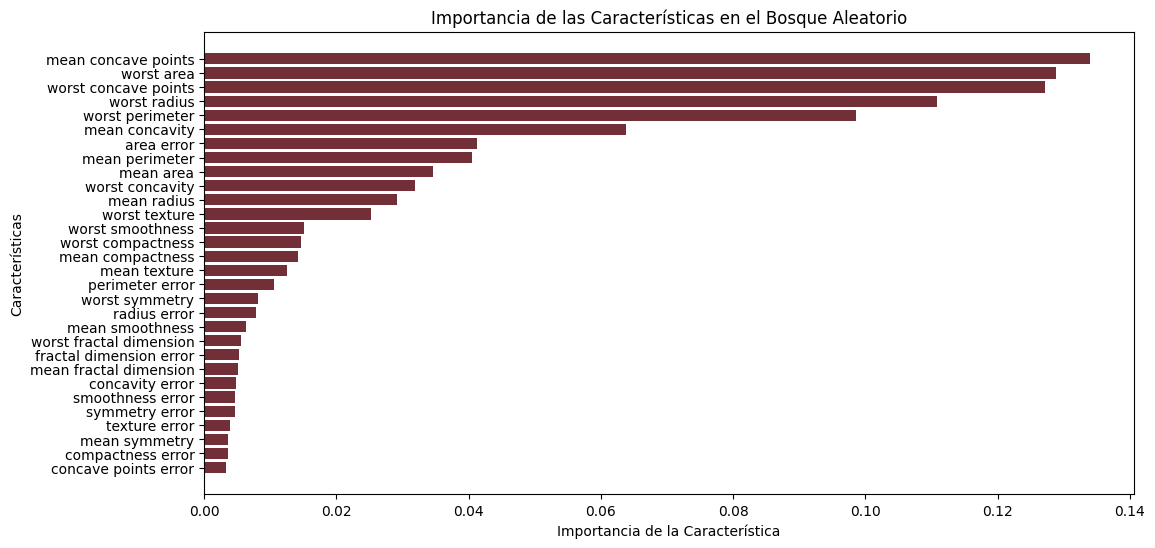

In [46]:
plt.figure(figsize=(12, 6))
plt.barh(sorted_features, sorted_importances, color='#722f37')
plt.xlabel("Importancia de la Característica")
plt.ylabel("Características")
plt.title("Importancia de las Características en el Bosque Aleatorio")
plt.gca().invert_yaxis()
plt.show()

De este modo podemos visualizar qué características son más relevantes para la clasificación en el dataset de cáncer de mama.

Para dar un resultado las características con mayor importancia tnendrán mayor influencia.

También se podría considerar dejar de considerar las características de muy baja importancia para reducir la dimensionalidad sin afectar significativamente el rendimiento.

## 9.

Las top 10 caracterısticas coinciden con lo que podrıas esperar de su correlacion con el diagnostico (target) que estudiamos en las clases previas?

Analiza las mas relevantes con una grafica de dispersion, donde cada punto
representa una caracterıstica.

Del eje. pasado ya tenemos la importancia de cada característica, extraemos las 10 más relevantes.

In [47]:
import seaborn as sns
import pandas as pd

In [48]:
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

print(feature_importance_df)

                    Feature  Importance
0               mean radius    0.029189
1              mean texture    0.012554
2            mean perimeter    0.040520
3                 mean area    0.034547
4           mean smoothness    0.006362
5          mean compactness    0.014251
6            mean concavity    0.063843
7       mean concave points    0.133951
8             mean symmetry    0.003656
9    mean fractal dimension    0.005181
10             radius error    0.007850
11            texture error    0.003865
12          perimeter error    0.010503
13               area error    0.041225
14         smoothness error    0.004682
15        compactness error    0.003630
16          concavity error    0.004871
17     concave points error    0.003320
18           symmetry error    0.004601
19  fractal dimension error    0.005281
20             worst radius    0.110806
21            worst texture    0.025189
22          worst perimeter    0.098633
23               worst area    0.128850


Ordenamos y nos quedamos con el top 10 más relevantes

In [49]:
top_10_features = feature_importance_df.sort_values(by="Importance", ascending=False).head(10)
print(top_10_features)

                 Feature  Importance
7    mean concave points    0.133951
23            worst area    0.128850
27  worst concave points    0.127220
20          worst radius    0.110806
22       worst perimeter    0.098633
6         mean concavity    0.063843
13            area error    0.041225
2         mean perimeter    0.040520
3              mean area    0.034547
26       worst concavity    0.031899


Grafiequemos la dispersión de las características más importantes

In [50]:
import matplotlib.pyplot as plt

In [51]:
df = pd.DataFrame(X, columns=feature_names)
df["Target"] = y

Individuales:

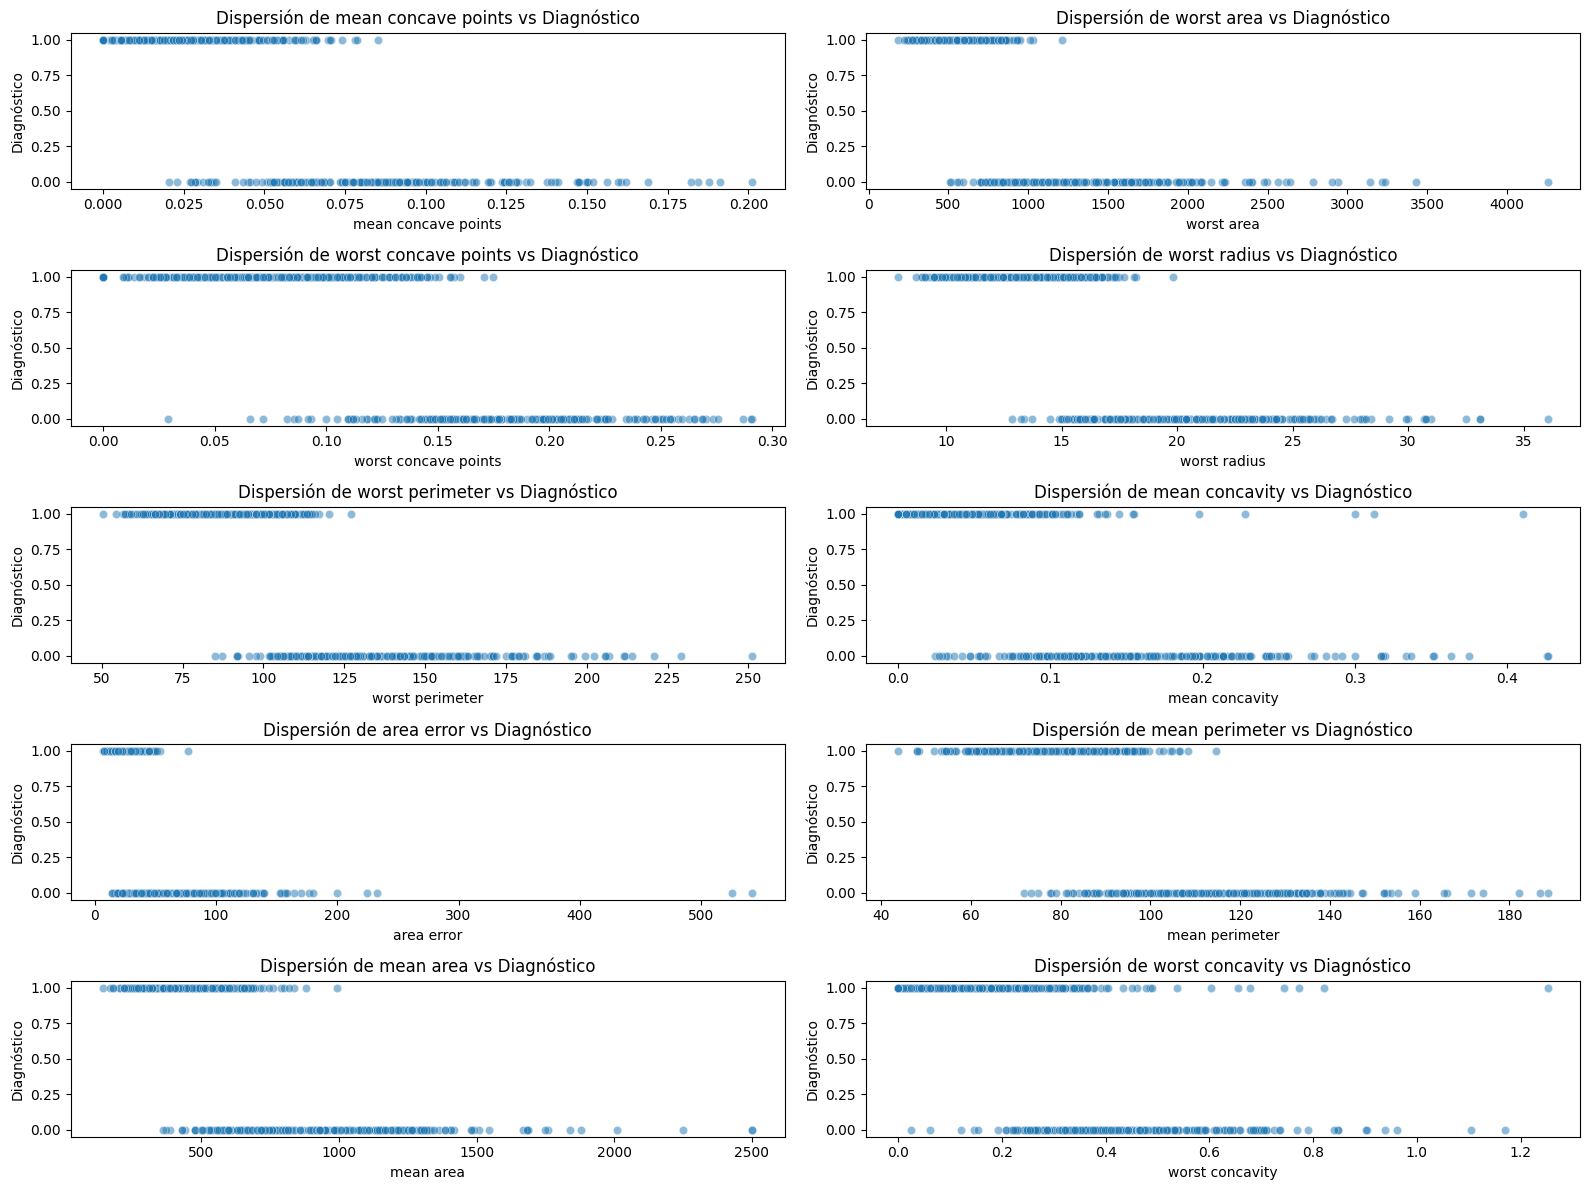

In [52]:
fig, axes = plt.subplots(5, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(top_10_features["Feature"]):
    sns.scatterplot(x=df[feature], y=df["Target"], alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Dispersión de {feature} vs Diagnóstico")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Diagnóstico") # (0 = Benigno, 1 = Maligno)

plt.tight_layout()
plt.show()

Todas juntas:

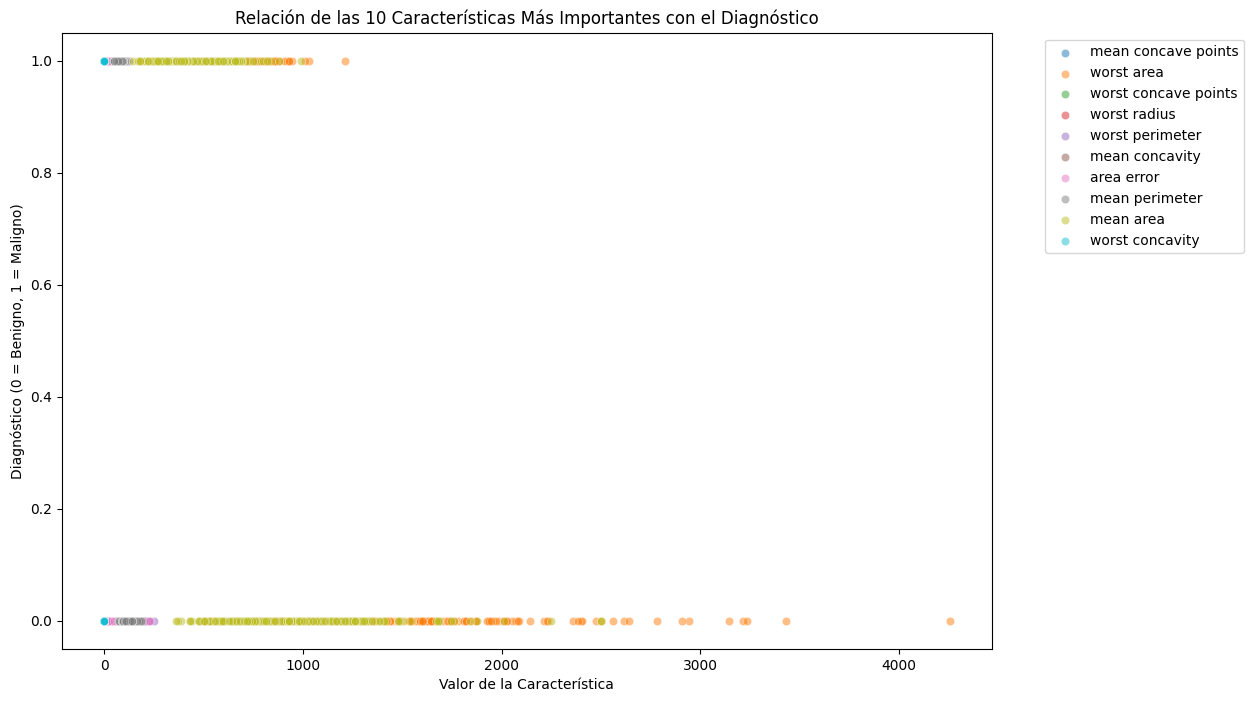

In [53]:
df = pd.DataFrame(X, columns=feature_names)
df["Target"] = y
plt.figure(figsize=(12, 8))
for feature in top_10_features["Feature"]:
    sns.scatterplot(x=df[feature], y=df["Target"], alpha=0.5, label=feature)
plt.xlabel("Valor de la Característica")
plt.ylabel("Diagnóstico (0 = Benigno, 1 = Maligno)")
plt.title("Relación de las 10 Características Más Importantes con el Diagnóstico")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Podemos ver que  Mean concave points, worst concave points, mean concavity, worst concavity,

Muestran una clara separación, con valores más altos asociados a tumores malignos.

Mientras que Worst perimeter, worst radius, worst area, mean perimeter, mean area

Si bien tienen una buena separación, hay con más solapamiento.

Area error si que muestra una distribución menos clara, donde algunos valores se traslapan en la misma región.

Mean perimeter y mean area también presentan  solapamiento, aunque hay una tendencia.

En general son muy parecidas a las correlaciones que vimos en la clase donde se nos presento esta data.

##10.

Investiga y aplica XGBoost o LightGBM en lugar de GradientBoostingClassifier, compara su velocidad de entrenamiento y precisi ́on con los metodos anteriores.

import xgboost as xgb
import lightgbm as lgb
GradientBoostingClassifier(n_estimators=10000 max_depth=3, random_state=123))
xgb.XGBClassifier(n_estimators=10000, max_depth=3, eval_metric=’logloss’,
random_state=123))
lgb.LGBMClassifier(n_estimators=10000, max_depth=3, random_state=123))

Vamos a comparar los 3 métodos tanto en presición como en velocidad de entrnamiento:
1. Gradient Boosting (GB)

2. XGBoost

3. LightGBM

Fijaremos los parametros en los 3 modelos, con n_estimators=10000 y max_depth=3

In [54]:
import time
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

Carguemos datos. (ya lo explique varias veces porque repito)

In [55]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=123)


Para medir el tiempo y precisión definamos una función:

In [56]:
def train_and_evaluate(model, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Precisión = {accuracy:.4f}, Tiempo = {train_time:.2f} s")
    return accuracy, train_time


Entrenemos los 3 modelos:

In [57]:
gb = GradientBoostingClassifier(n_estimators=10000, max_depth=3, random_state=123)
xgb_model = xgb.XGBClassifier(n_estimators=10000, max_depth=3, eval_metric='logloss', random_state=123)
lgb_model = lgb.LGBMClassifier(n_estimators=10000, max_depth=3, random_state=123)

gb_acc, gb_time = train_and_evaluate(gb, "Gradient Boosting")
xgb_acc, xgb_time = train_and_evaluate(xgb_model, "XGBoost")
lgb_acc, lgb_time = train_and_evaluate(lgb_model, "LightGBM")


Gradient Boosting: Precisión = 0.9737, Tiempo = 12.10 s
XGBoost: Precisión = 0.9737, Tiempo = 1.79 s
[LightGBM] [Info] Number of positive: 284, number of negative: 171
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624176 -> initscore=0.507311
[LightGBM] [Info] Start training from score 0.507311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training becaus

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Veamos los resultados:

In [58]:
print("\nComparación de modelos:")
print("\nComparación de modelos:")
print(f"Gradient Boosting - Precisión: {gb_acc:.4f}, Tiempo: {gb_time:.2f} s")
print(f"XGBoost - Precisión: {xgb_acc:.4f}, Tiempo: {xgb_time:.2f} s")
print(f"LightGBM - Precisión: {lgb_acc:.4f}, Tiempo: {lgb_time:.2f} s")


Comparación de modelos:

Comparación de modelos:
Gradient Boosting - Precisión: 0.9737, Tiempo: 12.10 s
XGBoost - Precisión: 0.9737, Tiempo: 1.79 s
LightGBM - Precisión: 0.9737, Tiempo: 1.10 s


En los 3 tuvimos la misma presición de 97.37 %

Vemos que LightGBM es bastante más rápido, seguido de XGBoost y mucho más alejado de ambos Gradient Boosting.